## Output has been removed from this notebook to reduce file sizes in the repo

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import pandana as pdna
import geopandas.io.osm as osm
%matplotlib inline

C:\Users\spm448\Anaconda\DLLs


## Download OpenStreetMap convenience stores for San Francisco proper

In [56]:
conven_gdf = osm.query_osm('node', 
                    bbox=[-122.539365,37.70000,-122.38050,37.816069],
                    tags={'shop'})
print len(conven_gdf)

1162


In [58]:
conven_gdf = conven_gdf[conven_gdf.type == 'Point'].to_crs(epsg=3740)
print conven_gdf.geometry.head(3)
print len(conven_gdf)

0    POINT (549701.0703286197 4183541.038927982)
1    POINT (553346.3821740602 4181216.888626116)
2    POINT (550752.0953939131 4180248.458444765)
Name: geometry, dtype: object
1162


In [41]:
x, y = zip(*[(p.x, p.y) for (i, p) 
             in conven_gdf.geometry.iteritems()])
x = pd.Series(x)
y = pd.Series(y)
print x.head()

0   -122.384976
1   -122.349285
2   -122.360391
3   -122.350349
4   -122.350202
dtype: float64


## Get OpenStreetMap networks for Bay Area that I had previously - someday soon we'll have direct OSM import

In [44]:
store = pd.HDFStore('data/osm_bayarea.h5', "r")
nodes = store.nodes
edges = store.edges
print len(nodes)

226060


In [36]:
# b_box = [-122.539365,37.13730,-122.347698,37.816069]
# transform = nodes.multiply([-2.2/(10*10*10*10), 9.0349/(10*10*10*10*10*10)])
# print transform
# print len(transform)

                 x          y
8      -138.448228  37.002765
9      -138.406606  37.005295
10     -138.369344  37.007768
11     -138.367130  37.009715
12     -138.367295  37.009866
13     -138.343480  37.011906
14     -138.307304  37.013532
15     -138.263111  37.016297
20     -129.128945  37.359901
21     -129.094268  37.359967
22     -129.092893  37.359962
23     -129.092232  37.359709
24     -129.091421  37.359531
25     -127.268859  37.403264
26     -127.265490  37.403334
27     -127.261915  37.403433
28     -127.258313  37.403535
39     -127.408985  37.407872
51     -128.631608  37.388399
52     -128.627207  37.388447
53     -127.254779  37.382303
55     -127.254875  37.384246
56     -127.253390  37.385958
57     -127.253129  37.387724
58     -127.252881  37.388772
60     -127.251204  37.390685
61     -127.252263  37.391968
62     -127.252606  37.392686
63     -127.252331  37.393186
64     -127.252359  37.393667
...            ...        ...
354665 -122.021309  37.716902
354668 -13

## Initialize and preprocess the network

In [28]:
del net

NameError: name 'net' is not defined

In [10]:
net=pdna.Network(nodes.x, 
                       nodes.y, 
                       edges["from"], 
                       edges.to, 
                       edges[["weight"]])
net.precompute(2000)

## Nearest *point-of-interest* queries

In [11]:
net.init_pois(num_categories=2, max_dist=2000, max_pois=50)

In [63]:
net.set_pois({"conveniences", "delis"}, x, y)

In [64]:
S_rn_df = net.nearest_pois(2000, {"conveniences", "delis"}, num_pois=20)
print len(S_rn_df)

226060


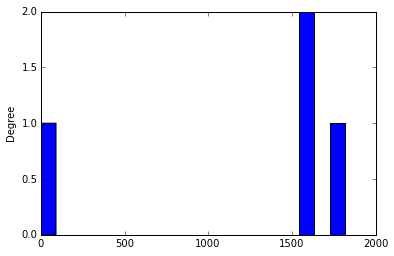

In [65]:
r_min_df = S_rn_df[S_rn_df.columns[0]]
r_min_df[r_min_df < 2000].plot(kind = 'hist', bins = 20)

In [15]:
node_ids = net.get_node_ids(x, y)

In [16]:
net.set(node_ids)

In [94]:
S_1000 = net.aggregate(1000, type="sum", decay="flat")
S_2000 = net.aggregate(2000, type="sum", decay="flat")

In [190]:
b = S_1000[S_1000 < 301]
c = b[b > 0]
ccounts = c.value_counts()
ccounts = ccounts.divide(float(sum(ccounts.values)))


d = S_2000[S_2000 < 301]
e = d[d > 0]
ecounts = e.value_counts()
ecounts = ecounts.divide(float(sum(ecounts.values)))

In [191]:
import matplotlib.pylab as plt

(0, 0.15)

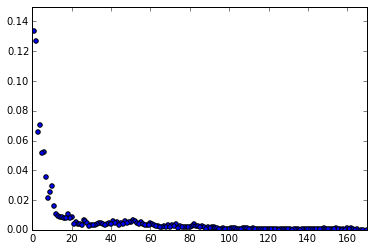

In [198]:
plt.scatter(ccounts.index, ccounts.values)
plt.xlim([0, len(ccounts)])
plt.ylim([0, 0.15])

0.0801350168771


(0, 0.1)

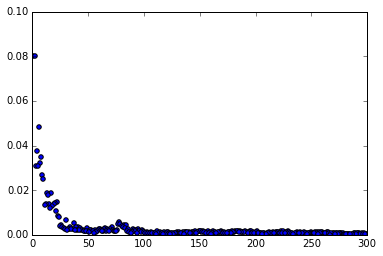

In [199]:
print ecounts.max()
plt.scatter(ecounts.index, ecounts.values)
plt.xlim([0, len(ecounts)])
plt.ylim([0, 0.1])

In [101]:
x = np.array(S_1000.x)

AttributeError: 'Series' object has no attribute 'x'

590.0
A = 3976.27119726
t = -0.00476859072321
y0 = 29.3930899026



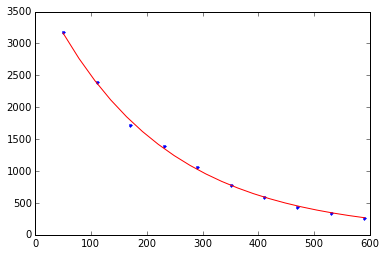

In [100]:
import numpy as np
import scipy as sp
import pylab as pl
from scipy.optimize.minpack import curve_fit

x = np.array([  50.,  110.,  170.,  230.,  290.,  350.,  410.,  470.,  
530.,  590.])
y = np.array([ 3173.,  2391.,  1726.,  1388.,  1057.,   786.,   598.,   
443.,   339.,   263.])

smoothx = np.linspace(x[0], x[-1], 20)

guess_a, guess_b, guess_c = 4000, -0.005, 100
guess = [guess_a, guess_b, guess_c]

exp_decay = lambda x, A, t, y0: A * np.exp(x * t) + y0

params, cov = curve_fit(exp_decay, x, y, p0=guess)

A, t, y0 = params

print "A = %s\nt = %s\ny0 = %s\n" % (A, t, y0)

pl.clf()
best_fit = lambda x: A * np.exp(t * x) + y0

pl.plot(x, y, 'b.')
pl.plot(smoothx, best_fit(smoothx), 'r-')
pl.show()

In [84]:
print c.head(10)

731       223
732       240
36486     146
36487     141
36488     171
36489     202
122786    172
122787    169
122788     13
122789     13
dtype: float32


In [19]:
S_eff_df1 = net.aggregate(2000, type="count", decay="flat") 

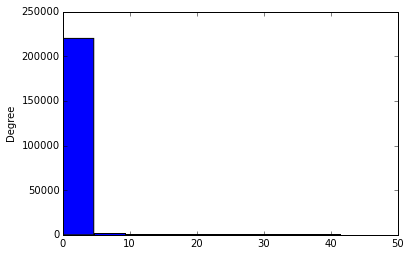

In [20]:
S_eff_df1.plot(kind='hist')

In [22]:
from shapely.geometry import Point
from fiona.crs import from_epsg
import geopandas as gpd
bbox=[-122.539365,37.43730,-122.347698,37.816069]
bbox = gpd.GeoSeries([Point(bbox[0], bbox[1]),
                      Point(bbox[2], bbox[3])], 
                     crs=from_epsg(4326))
bbox = bbox.to_crs(epsg=3740)
bbox = [bbox[0].x, bbox[0].y, bbox[1].x, bbox[1].y]

## Here's a map of the distance to the nearest restaurant

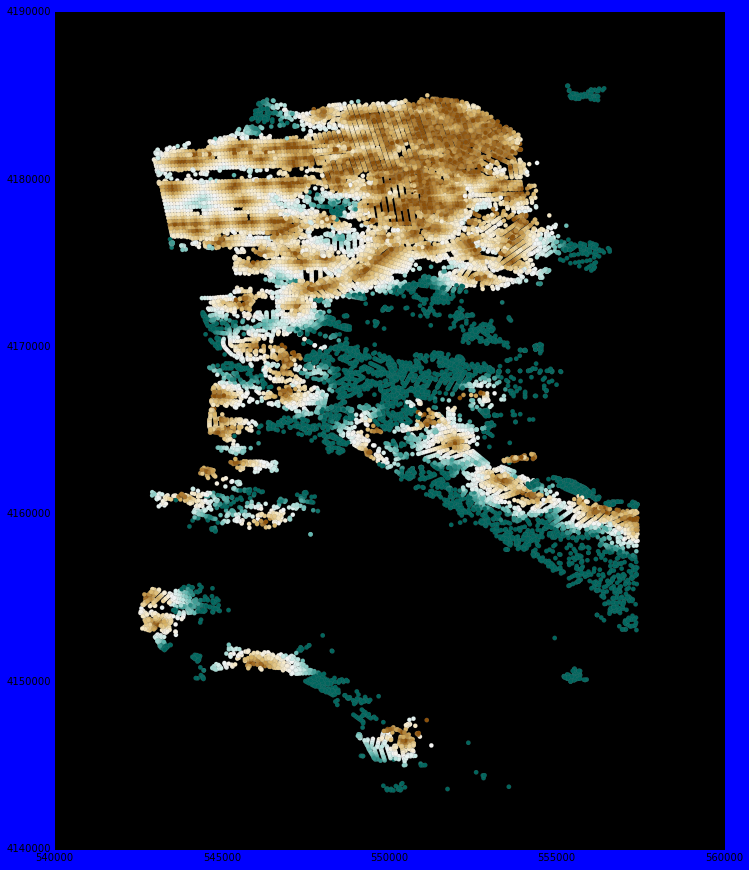

In [23]:
net.plot(r_min_df, bbox=bbox, scheme="diverging", 
         color="BrBG")

## Here's a map of the distance to the 5th nearest restaurant

In [ ]:
net.plot(a[5], bbox=bbox, scheme="diverging", 
         color="BrBG")

## Here's a map of the distance to the 10th nearest restaurant

In [ ]:
net.plot(a[10], bbox=bbox, scheme="diverging", 
         color="BrBG")

# A similar workflow is used to do general network aggregations

## Relate the x-ys to nodes

## Assign the variable (in this case just location) to the network

## This is it - run the queries!

In [17]:
%time s = net.aggregate(500, type="sum", decay="linear")
%time t = net.aggregate(1000, type="sum", decay="linear")
%time u = net.aggregate(2000, type="sum", decay="linear")
%time v = net.aggregate(3000, type="sum", decay="linear")
%time w = net.aggregate(3000, type="count", decay="flat")

Wall time: 220 ms
Wall time: 258 ms
Wall time: 492 ms
Wall time: 13.2 s
Wall time: 13.2 s


In [ ]:
# Let's do some data analysis

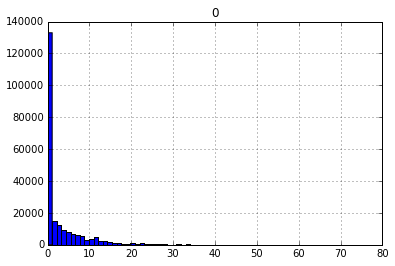

In [33]:
t_df = pd.DataFrame(w)
t_hist = t_df.hist(bins=70)

## Here's a map of access to restaurants with a 500m radius

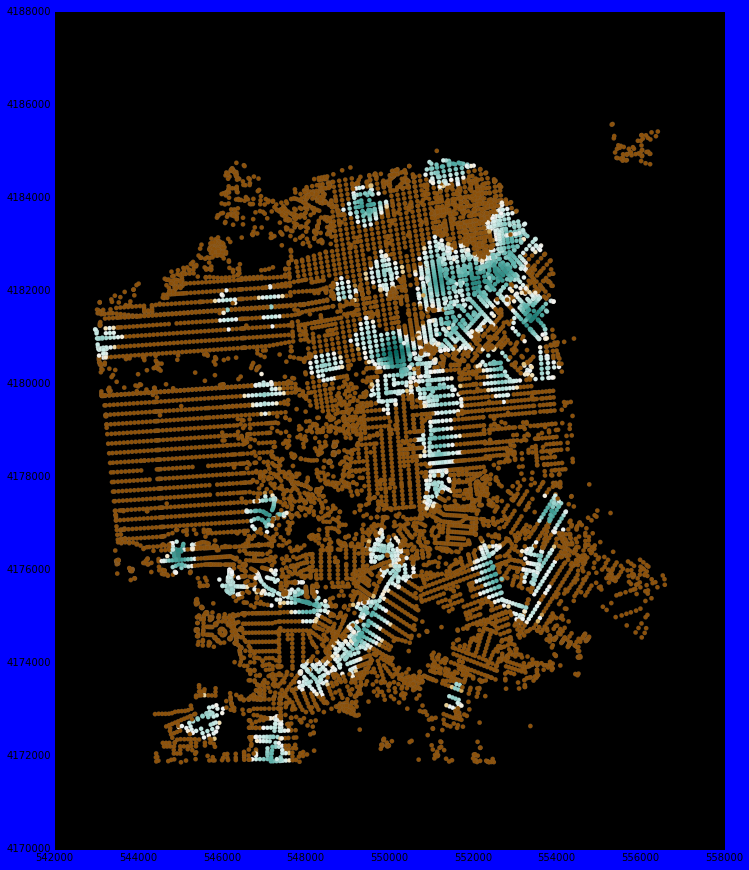

In [18]:
net.plot(s, bbox=bbox, scheme="diverging", 
         color="BrBG", log_scale=True)

## Or 1000 meters

In [ ]:
net.plot(t, bbox=bbox, scheme="diverging", 
         color="BrBG", log_scale=True)

## Or 2000 meters radius

In [ ]:
net.plot(u, bbox=bbox, scheme="diverging", 
         color="BrBG", log_scale=True)

## Or 3000m radius

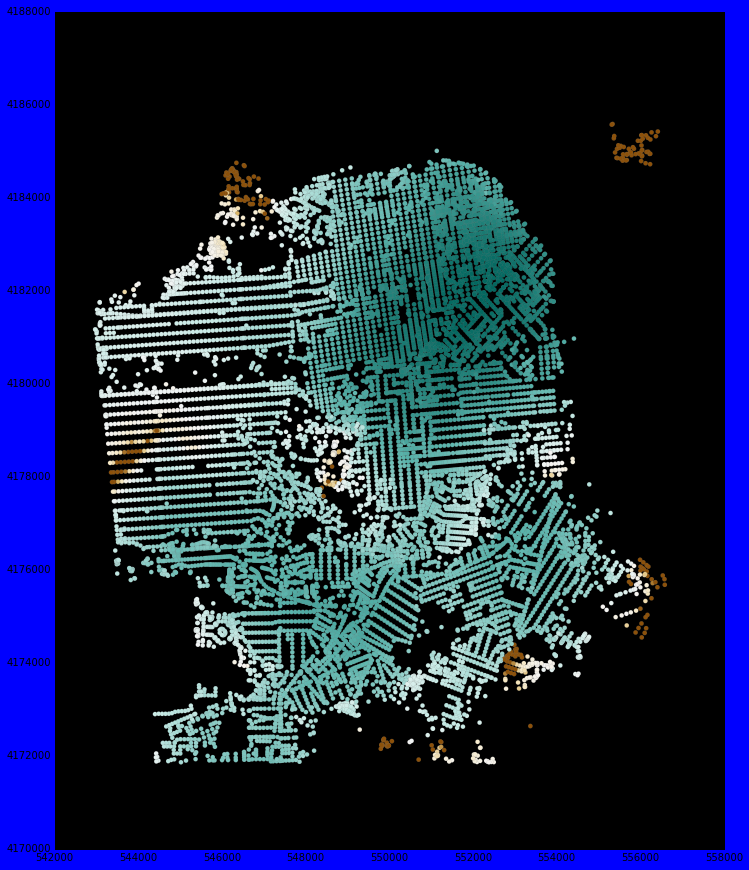

In [19]:
net.plot(v, bbox=bbox, scheme="diverging", 
         color="BrBG", log_scale=True)

## Or the whole Bay Area region - someone please help me with this visualization!

In [ ]:
net.plot(v, scheme="diverging", 
         color="BrBG", log_scale=True)